<a href="https://colab.research.google.com/github/MatthewG45/Modelling_final_project/blob/main/Modelling_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def run_simulation(population_size, initial_infected, base_infection_probability, demographic_growth_rate, days, temperature_effect, mortality_rate, avg_length_sick, temperature, interactions_per_day, antibody_effectiveness):
  print("Start Simulation")

  recovered_to_infected= 0

  # calculates a gaussian curve of probability for mortality rate per day, with a higher death chance in the middle of the sickness vs on the ends.
  death_rate_per_day = [abs(ele) for ele in (sorted([random.gauss(mortality_rate, 1/3) for _ in range(int(avg_length_sick))]))]
  for i in range(len(death_rate_per_day)):
    death_rate_per_day[i] = death_rate_per_day[i]/1000

  # chaning infection probability by temperature input
  def adjust_infection_probability(base_prob, temp):
    if temp < 20: # essentially, increases infection probability the colder it is, and it does not change above 20C (stays as base)
      return base_prob + (20 - temp) * temperature_effect
    return base_prob
  infection_probability = adjust_infection_probability(base_infection_probability, temperature)

  # Initialize populations to zero for each simulation
  population = np.zeros(population_size)
  population_infected_days = np.zeros(population_size)

  # define random person(s) in the population array to be infected
  population[np.random.choice(population_size, initial_infected, replace=False)] = 1
  infected_counts = [initial_infected]
  deathcounts = []
  recoveredcounts = []
  healthycounts = []

  # Now, iterate over the number of simulation days
  for day in range(days):
    for person in range(population_size): # now, iterate over every single person in the population
      if person < len(population) and population[person] == 1: # only consider those that are infected

        # Here we determine how long they have been infected, if they die from sickness, and if they recover
        if population_infected_days[person] > 0: # consider those with at least 1 day infected (always true)
          if population_infected_days[person] < avg_length_sick: # only consider if they are within avg_length_sick days of infection
            if np.random.random() < death_rate_per_day[int(population_infected_days[person])]: # here, we generate a random number and compare it against the death rate for their day length of sickness
              population[person] = 2
            population_infected_days[person] += 1 # if they do not die, increment their number of days infected
          else:
            population[person] = 3 # if they are not within avg_length_sick days of infection and did not die, they become immune and recover

        # Here, we determine who this sick person infects
        if person < len(population) and population[person] == 1: # check if they are sick again since they may have died or recovered
          for _ in range(interactions_per_day): # now, because the person is sick, iterate over each of their interactions with other people
            other_person = np.random.randint(0, population_size) # get a random person
            if population[other_person] == 0: # check if that random person is healthy
              if np.random.random() < infection_probability: # generate a random number and compare it against the infection rate to determine if they become infected
                population[other_person] = 1
                population_infected_days[other_person] += 1 # increment their days infected

            # recovered people can still be infected, but at a low chance depending on how shortly they have been recovered
            if population[other_person] == 3: # check if the person is a recovered victim
              if population_infected_days[other_person] < antibody_effectiveness[0][0]: # check if they have been infected under a certain number of days
                population_infected_days[other_person] += 1 # in this case they are immune, so only increment days infected (always assume days recovered is (days infected - 10))
              elif population_infected_days[other_person] < antibody_effectiveness[1][0]:
                if np.random.random() < infection_probability*antibody_effectiveness[1][1]: # since they are no longer immune infect them at a factored chance by the antibody effectiveness
                  population[other_person] = 1
                  population_infected_days[other_person] = 0
                  population_infected_days[other_person] += 1
                  recovered_to_infected += 1
                population_infected_days[other_person] += 1

              elif population_infected_days[other_person] < antibody_effectiveness[2][0]:
                if np.random.random() < infection_probability*antibody_effectiveness[2][1]:
                  population[other_person] = 1
                  population_infected_days[other_person] = 0
                  population_infected_days[other_person] += 1
                  recovered_to_infected += 1
                population_infected_days[other_person] += 1

              elif population_infected_days[other_person] < antibody_effectiveness[3][0]:
                if np.random.random() < infection_probability*antibody_effectiveness[3][1]:
                  population[other_person] = 1
                  population_infected_days[other_person] = 0
                  population_infected_days[other_person] += 1
                  recovered_to_infected += 1
                population_infected_days[other_person] += 1

              elif population_infected_days[other_person] > antibody_effectiveness[4][0]: ##last elif, days recovered is now > rather than <, person no longer has antibodies
                if np.random.random() < infection_probability*antibody_effectiveness[4][1]:
                  population[other_person] = 1
                  population_infected_days[other_person] = 0
                  population_infected_days[other_person] += 1
                  recovered_to_infected += 1
                population_infected_days[other_person] += 1


    # now, we add the demographic growth to the current population
    new_individuals = int(population_size * demographic_growth_rate) # calculate the amount of new individuals
    population = np.append(population, np.zeros(new_individuals)) # add the new individuals to the population as healthy

    population_infected_days = np.append(population_infected_days, np.zeros(new_individuals)) # add the new individuals to the population as healthy

    population_size += new_individuals # increment the population_size used for determining

    healthy = 0
    deathcount = 0
    recovered = 0
    infected_count=0
    for person in range(len(population)):
      if population[person] == 2:
        deathcount += 1
      elif population[person] == 3:
        recovered += 1
      elif population[person] == 1:
        infected_count+=1
      elif population[person] == 0:
        healthy+=1
    infected_counts.append(infected_count)
    deathcounts.append(deathcount)
    recoveredcounts.append(recovered)
    healthycounts.append(healthy)


    # if statement for printing day epoch
    # prints zero'th day as 1, and every 5th day after
    if day == 0:
      print(f"Day {day}: {infected_counts[day]} people are infected, {deathcount} people are dead, {recovered} people have recovered, {healthy} people are still healthy, {recovered_to_infected} people have been re-infected, Population: {population_size}")
    elif day%10 == 0:
      print(f"Day {day}: {infected_counts[day]} people are infected, {deathcount} people are dead, {recovered} people have recovered, {healthy} people are still healthy, {recovered_to_infected} people have been re-infected, Population: {population_size}")

    # if statement for ending early if healthy population is less than 1% of population
    if population_size*0.9999 < infected_counts[day]:
      if day+1 == days:
        print(f"Day {day}: {infected_counts[day]} people are infected, {deathcount} people are dead, {recovered} people have recovered, {healthy} people are still healthy, {recovered_to_infected} people have been re-infected, Population: {population_size}")
      elif day%10 != 0:
        print(f"Day {day}: {infected_counts[day]} people are infected, {deathcount} people are dead, {recovered} people have recovered, {healthy} people are still healthy, {recovered_to_infected} people have been re-infected, Population: {population_size}")

      return infected_counts, deathcount, recovered, healthy, deathcounts, recoveredcounts, healthycounts

  return infected_counts, deathcount, recovered, healthy, deathcounts, recoveredcounts, healthycounts

In [ ]:
# Base variables
population_size = 10000 # in num of persons
initial_infected = 1 # in num of persons
base_infection_probability = 0.03 # in %
demographic_growth_rate = 0.029/365 # in %, canadas annual growth rate divided by the days in a year
days = 100 # simulation time
temperature_effect = 0.01 # temp factor
mortality_rate = 61.3/100000 # deaths per 100000
avg_length_sick = 10 # in days
temperature = 20 # in C
interactions_per_day = 15
antibody_effectiveness = [[15, 0], # [[days sick - avg_length_sick, infection rate factor]] #factor of 0 since they are immune
                          [25, 0.2],
                          [30, 0.5],
                          [35, 0.9],
                          [35, 1]] # last one matchs no. days since its a greater than, also has 1 factor since antibodies are no longer effective

Base Factor values

Start Simulation
Day 0: 1 people are infected, 0 people are dead, 0 people have recovered, 9999 people are still healthy, 0 people have been re-infected, Population: 10000
Day 10: 7710 people are infected, 10 people are dead, 0 people have recovered, 865 people are still healthy, 0 people have been re-infected, Population: 10000
Day 20: 2613 people are infected, 30 people are dead, 7991 people have recovered, 0 people are still healthy, 1458 people have been re-infected, Population: 10000
Day 30: 3905 people are infected, 37 people are dead, 6346 people have recovered, 0 people are still healthy, 5695 people have been re-infected, Population: 10000
Day 40: 639 people are infected, 45 people are dead, 9390 people have recovered, 0 people are still healthy, 6448 people have been re-infected, Population: 10000
Day 50: 488 people are infected, 46 people are dead, 9430 people have recovered, 0 people are still healthy, 7042 people have been re-infected, Population: 10000
Day 60: 841 people 

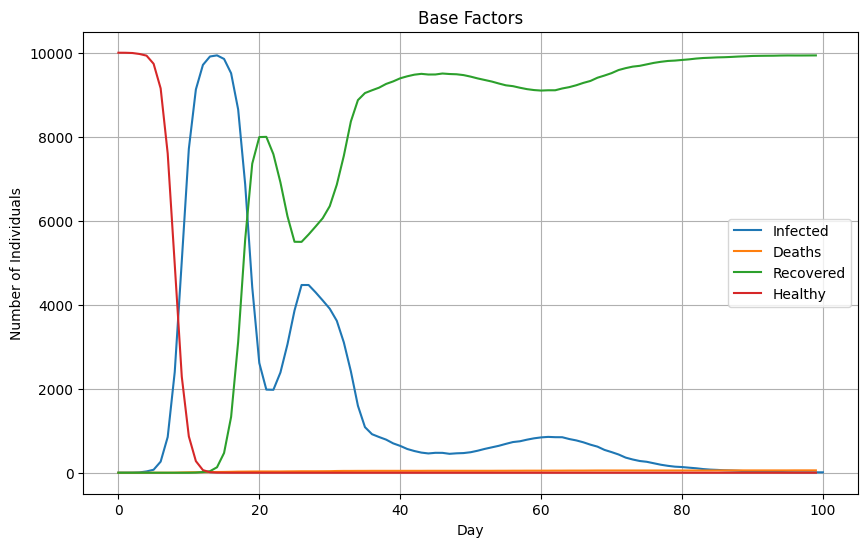

In [ ]:
plt.figure(figsize=(10, 6))

# Run simulations and plot
infected_counts, deathcount, recovered, healthy, deathcounts, recoveredcounts, healthycounts = run_simulation(population_size, initial_infected, base_infection_probability, demographic_growth_rate, days, temperature_effect, mortality_rate, avg_length_sick, temperature, interactions_per_day, antibody_effectiveness)
plt.plot(infected_counts, label=f'Infected')
plt.plot(deathcounts, label=f'Deaths')
plt.plot(recoveredcounts, label=f'Recovered')
plt.plot(healthycounts, label=f'Healthy')
print('\n')

plt.xlabel('Day')
plt.ylabel('Number of Individuals')
plt.title('Base Factors')
plt.legend()
plt.grid(True)
plt.show()

Interactions per day

Start Simulation
Day 0: 1 people are infected, 0 people are dead, 0 people have recovered, 9997 people are still healthy, 0 people have been re-infected, Population: 10000
Day 10: 136 people are infected, 0 people are dead, 3 people have recovered, 9804 people are still healthy, 0 people have been re-infected, Population: 10000
Day 20: 3691 people are infected, 7 people are dead, 239 people have recovered, 5241 people are still healthy, 0 people have been re-infected, Population: 10000
Day 30: 5655 people are infected, 21 people are dead, 4574 people have recovered, 486 people are still healthy, 682 people have been re-infected, Population: 10000
Day 40: 1352 people are infected, 26 people are dead, 8606 people have recovered, 185 people are still healthy, 1835 people have been re-infected, Population: 10000
Day 50: 569 people are infected, 27 people are dead, 9320 people have recovered, 136 people are still healthy, 2426 people have been re-infected, Population: 10000
Day 60: 241 peop

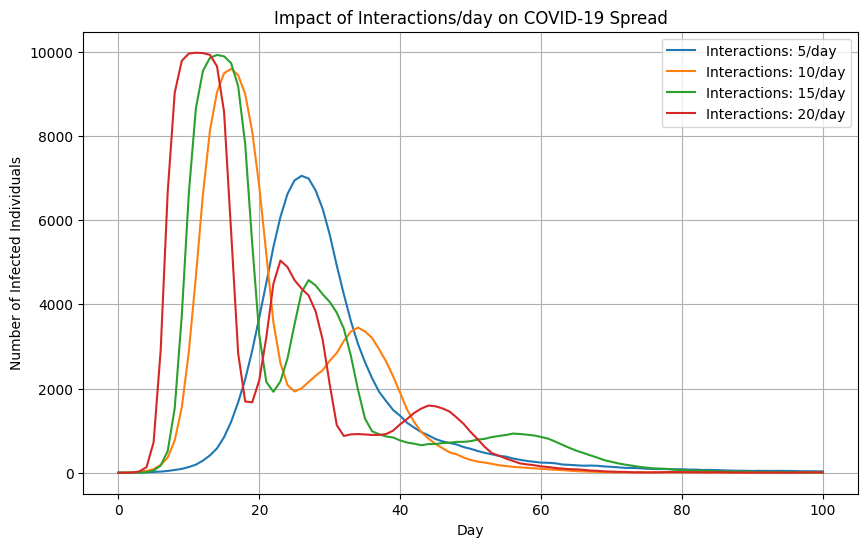

In [ ]:
# Interactions to simulate
interactions = [5,10,15,20]  # Example temperatures
plt.figure(figsize=(10, 6))

# Run simulations and plot
for interaction in interactions:
    infected_counts, deathcount, recovered, healthy, deathcounts, recoveredcounts, healthycounts = run_simulation(population_size, initial_infected, base_infection_probability, demographic_growth_rate, days, temperature_effect, mortality_rate, avg_length_sick, temperature, interaction, antibody_effectiveness)
    plt.plot(infected_counts, label=f'Interactions: {interaction}/day')
    print("Deathcount: ", deathcount," Recovered: ",recovered," Healthy: ",healthy)
    print('\n')

plt.xlabel('Day')
plt.ylabel('Number of Infected Individuals')
plt.title('Impact of Interactions/day on COVID-19 Spread')
plt.legend()
plt.grid(True)
plt.show()

Start Simulation
Day 0: 1 people are infected, 0 people are dead, 0 people have recovered, 9999 people are still healthy, 0 people have been re-infected, Population: 10000
Day 10: 9989 people are infected, 12 people are dead, 1 people have recovered, 0 people are still healthy, 0 people have been re-infected, Population: 10000
Day 20: 1099 people are infected, 22 people are dead, 8347 people have recovered, 0 people are still healthy, 1635 people have been re-infected, Population: 10000
Day 30: 7010 people are infected, 42 people are dead, 3832 people have recovered, 0 people are still healthy, 9400 people have been re-infected, Population: 10000
Day 40: 5823 people are infected, 51 people are dead, 4255 people have recovered, 0 people are still healthy, 15682 people have been re-infected, Population: 10000
Day 50: 3560 people are infected, 58 people are dead, 5897 people have recovered, 0 people are still healthy, 20163 people have been re-infected, Population: 10000
Day 60: 2293 peop

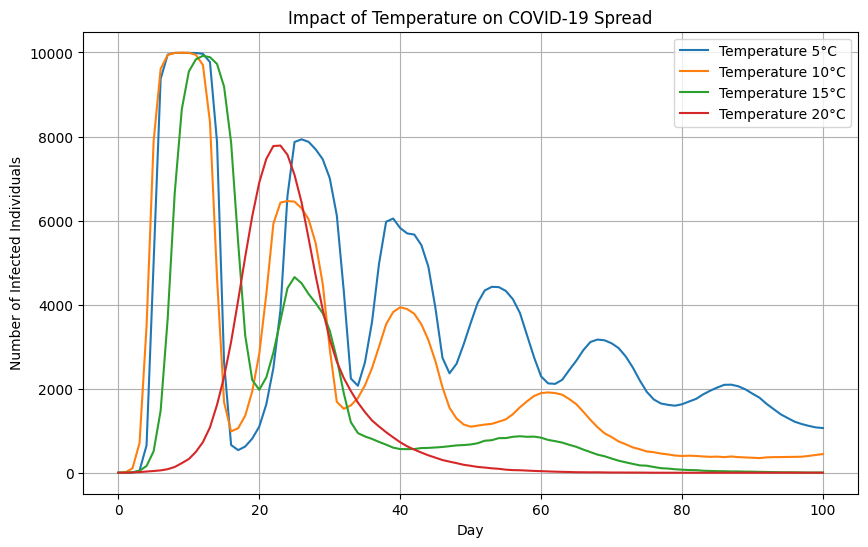

In [ ]:
# Temperatures to simulate
temperatures = [5,10,15,20]  # Example temperatures
plt.figure(figsize=(10, 6))

# Run simulations and plot
for temp in temperatures:
    infected_counts, deathcount, recovered, healthy, deathcounts, recoveredcounts, healthycounts = run_simulation(population_size, initial_infected, base_infection_probability, demographic_growth_rate, days, temperature_effect, mortality_rate, avg_length_sick, temp, interactions_per_day, antibody_effectiveness)
    plt.plot(infected_counts, label=f'Temperature {temp}°C')
    print("Deathcount: ", deathcount," Recovered: ",recovered," Healthy: ",healthy)
    print('\n')

plt.xlabel('Day')
plt.ylabel('Number of Infected Individuals')
plt.title('Impact of Temperature on COVID-19 Spread')
plt.legend()
plt.grid(True)
plt.show()

Start Simulation
Day 0: 1 people are infected, 0 people are dead, 0 people have recovered, 9984 people are still healthy, 0 people have been re-infected, Population: 10000
Day 10: 9981 people are infected, 12 people are dead, 35 people have recovered, 0 people are still healthy, 6 people have been re-infected, Population: 10000
Day 20: 4097 people are infected, 34 people are dead, 4995 people have recovered, 0 people are still healthy, 5043 people have been re-infected, Population: 10000
Day 30: 960 people are infected, 49 people are dead, 8969 people have recovered, 0 people are still healthy, 6226 people have been re-infected, Population: 10000
Day 40: 1581 people are infected, 55 people are dead, 8298 people have recovered, 0 people are still healthy, 8043 people have been re-infected, Population: 10000
Day 50: 542 people are infected, 58 people are dead, 9509 people have recovered, 0 people are still healthy, 8690 people have been re-infected, Population: 10000
Day 60: 95 people ar

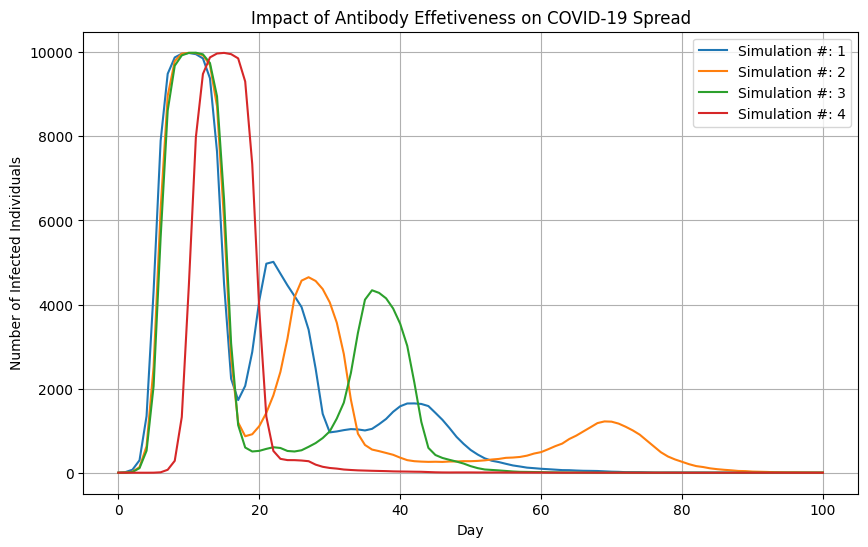

In [ ]:
# antibody_resistance to simulate    # [[days sick - avg_length_sick, infection rate factor]] #factor of 0 since they are immune
antibody_effectiveness_list = [[[15, 0], # 5
                          [25, 0.2],# 15
                          [30, 0.5],# 20
                          [35, 0.9],# 25
                          [35, 1]],# >25
                          [[20,0],
                           [30,0.2],
                           [35,0.5],
                           [40,0.9],
                           [40,1]],
                          [[25,0],
                           [35,0.2],
                           [40,0.5],
                           [45,0.9],
                           [45,1]],
                          [[30,0],
                           [40,0.2],
                           [45,0.5],
                           [50,0.9],
                           [50,1]]]
plt.figure(figsize=(10, 6))
count = 1
# Run simulations and plot
for antibody_effectiveness1 in antibody_effectiveness_list:
    infected_counts, deathcount, recovered, healthy, deathcounts, recoveredcounts, healthycounts = run_simulation(population_size, initial_infected, base_infection_probability, demographic_growth_rate, days, temperature_effect, mortality_rate, avg_length_sick, temperature, interaction, antibody_effectiveness1)
    plt.plot(infected_counts, label=f'Simulation #: {count}')
    print("Deathcount: ", deathcount," Recovered: ",recovered," Healthy: ",healthy)
    print('\n')
    count += 1

plt.xlabel('Day')
plt.ylabel('Number of Infected Individuals')
plt.title('Impact of Antibody Effetiveness on COVID-19 Spread')
plt.legend()
plt.grid(True)
plt.show()